In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
% matplotlib inline

# accuracy

In [3]:
# declare arrays
eff = []
main = []
dr = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
for jj in range(6):
    # baseline parameters
    Nsteps = 1
    nout = 300
    sizex = 1.0
    dif = 1.0
    vel = 0.1

    # set Diffusion coefficient to 1
    D = 0.1

    # mesh size and CFL numbers checked out by condition
    #dx = sizex/float(nx-1)
    #dt = (10**(-3))*10**(-2*jj)
    dx = float(dr[jj])
    nx = int(1/dx +1)
    dt = 10**(-13)
    f = np.zeros(nx+2)
    fnew = np.zeros(nx+2)
    x = exact = np.zeros(nx)
    delta = D*dt/(dx**2)
    a = b = delta
    c = 1-2*delta
    sigma = np.sqrt(2*D*1)
    for i in range(nx):
        x[i] = dx*(i)
        xj = (x[i]-sizex/2)/sigma
        f[i+1] = (1.0/sigma)*np.exp(-xj*xj)

    #plt.plot(x,f[1:-1])
    #main.append(np.copy(f))
    start = time.clock()
    for j in range(0,Nsteps):
        f[0] = f[nx]
        f[nx+1] = f[1]
        for k in range(1,nx+1):
            fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
        for k in range(1,nx+1):
            f[k] = fnew[k]    
    eff.append((time.clock() - start))    
    main.append(f[1:-1])
    


In [4]:
main = np.array(main)
xts = np.zeros((5,11))
for i in range(5):
    for j in range(10):
        xts[i,j] = main[i+1][j*10**(i+1)]
    xts[i,-1] = main[i+1][-1]
# main[0][2]
# main[1][20]
# rez = np.array(())
# for i in range(6):
#     rez.append()
# main[2][100]
#main[1,10]
#results = [np.linalg.norm(main[i+1,:]-main[i,:]) for i in range(4)]

In [5]:
print(main[0],xts[0,:],xts[1,:])
rez = []
rez.append(np.linalg.norm(main[0]-xts[0,:]))
for k in range(3):
    rez.append(np.linalg.norm(xts[k+1,:]-xts[k,:]))
    
rez

[ 0.6406442   1.00473011  1.42577989  1.83073762  2.12701366  2.23606798
  2.12701366  1.83073762  1.42577989  1.00473011  0.6406442 ] [ 0.6406442   1.00473011  1.42577989  1.83073762  2.12701366  2.23606798
  2.12701366  1.83073762  1.42577989  1.00473011  0.6406442 ] [ 0.6406442   1.00473011  1.42577989  1.83073762  2.12701366  2.23606798
  2.12701366  1.83073762  1.42577989  1.00473011  0.6406442 ]


[4.0827233093572606e-12,
 4.0770904899179767e-11,
 4.0770339659944943e-10,
 3.2032370867446502e-05]

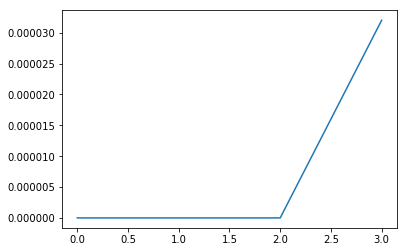

In [26]:
plt.plot(rez)

(-1e-10, 0.01)

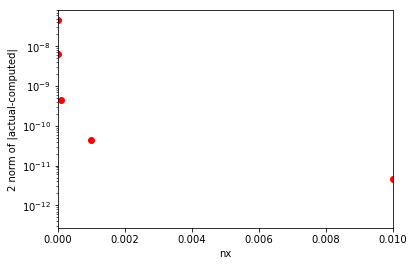

In [10]:
# exact vs calculated
% matplotlib inline
xx = [10**(-jj) for jj in range(6)]
plt.figure()
plt.semilogy(dr,main,'ro')
plt.xlabel('nx')
plt.ylabel('2 norm of |actual-computed|')
plt.xlim([0-10**(-10),10**-2])
#plt.ylim([])

# CFL condition tweaks

In [2]:
def CFLtest(niters,deltat):
    # declare arrays
    nx = niters
    nm = 4
    x = exact = np.zeros(nx)
    f = np.zeros(nx+2)
    fnew = np.zeros(nx+2)
    fmom = np.zeros(nm+2)
    hmom = np.zeros(nm+2)
    xmom = np.zeros(nm+2)
    # baseline parameters
    Nsteps = 1000
    nout = 300
    sizex = 1.0
    dif = 1.0
    vel = 0.1
    main = []
    # set Diffusion coefficient to 1
    D = 1

    # mesh size and CFL numbers checked out by condition
    dx = sizex/float(nx-1)
    dt = deltat
    delta = D*dt/(dx**2)
    a = b = delta
    c = 1-2*delta
    sigma = np.sqrt(2*D*1)
    for i in range(nx):
        x[i] = dx*float(i)
        xj = (x[i]-sizex/2)/sigma
        f[i+1] = (1.0/sigma)*np.exp(-xj*xj)

    #plt.plot(x,f[1:-1])
    #main.append(np.copy(f))
    for j in range(0,Nsteps):
        f[0] = f[nx]
        f[nx+1] = f[1]
        for k in range(1,nx+1):
            fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
        for k in range(1,nx+1):
            f[k] = fnew[k]
        main.append(np.copy(f))

    main = np.array(main)
    return x,main[:,1:-1]

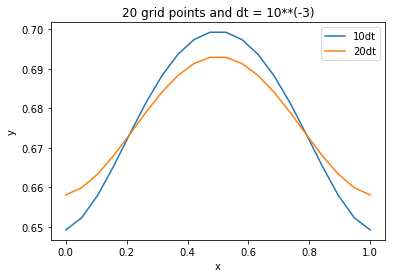

In [19]:
x, main = CFLtest(20,10**(-3))
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[20,:],label = '20dt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 grid points and dt = 10**(-3)')
plt.legend()

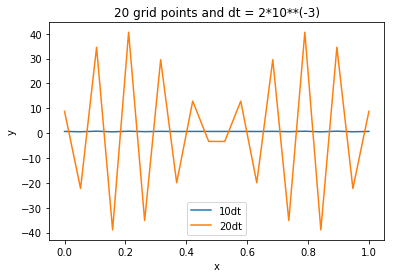

In [20]:
x, main = CFLtest(20,2*10**(-3))
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[20,:],label = '20dt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 grid points and dt = 2*10**(-3)')
plt.legend()

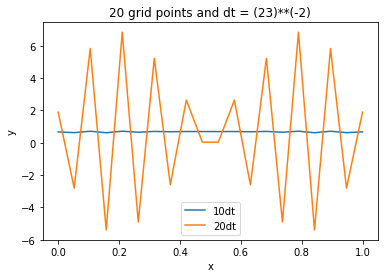

In [21]:
x, main = CFLtest(20,1/23**2)
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[20,:],label = '20dt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 grid points and dt = (23)**(-2)')
plt.legend()

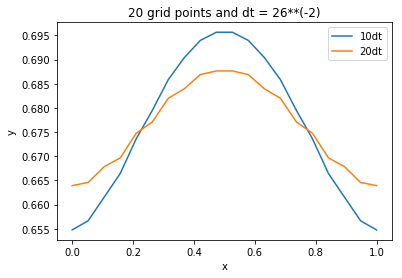

In [22]:
x, main = CFLtest(20,26**(-2))
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[20,:],label = '20dt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 grid points and dt = 26**(-2)')
plt.legend()

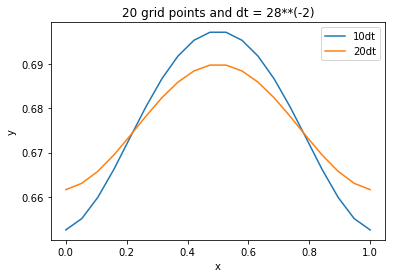

In [24]:
x, main = CFLtest(20,28**(-2))
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[20,:],label = '20dt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 grid points and dt = 28**(-2)')
plt.legend()

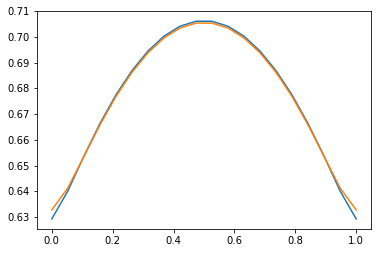

In [37]:
x, main = CFLtest(20,1/(100**2))
plt.plot(x,main[10,:],x,main[20,:])


# Matrix implementation

In [25]:
# declare arrays
main = []

nx = 200
nm = 4
x = exact = np.zeros(nx)
f = np.zeros(nx)
fnew = np.zeros(nx)
# baseline parameters
Nsteps = 3001
nout = 300
sizex = 1.0
dif = 1.0
vel = 0.1

# set Diffusion coefficient to 1
D = 1

# mesh size and CFL numbers checked out by condition
dx = sizex/float(nx-1)
dt = (10**(-5))
delta = D*dt/(dx**2)
a = b = delta
c = 1-2*delta
sigma = 0.1
for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i] = (1.0/sigma)*np.exp(-xj*xj)
    
tfer = np.diag(c*np.ones(nx),0) + np.diag(a*np.ones(nx-1),-1) + np.diag(b*np.ones(nx-1),1)
tfer[0,-1] = a
tfer[-1,0] = b
tfer
start = time.clock()
for j in range(Nsteps):
    fnew = np.dot(tfer,f.T)
    f = np.copy(fnew)
    main.append(f)
main = np.array(main)
print(time.clock()-start)
# #plt.plot(x,f[1:-1])
# #main.append(np.copy(f))
# start = time.clock()
# for j in range(0,Nsteps):
#     f[0] = f[nx]
#     f[nx+1] = f[1]
#     for k in range(1,nx+1):
#         fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
#     for k in range(1,nx+1):
#         f[k] = fnew[k]    
# eff.append((time.clock() - start))    
# sigma = np.sqrt(2*D*(1+dt))
# for i in range(nx):
#     xj = (x[i]-sizex/2)/sigma
#     exact[i] = (1.0/sigma)*np.exp(-xj*xj)
# main.append(np.linalg.norm(exact - f[1:-1]))



0.03624871515057748


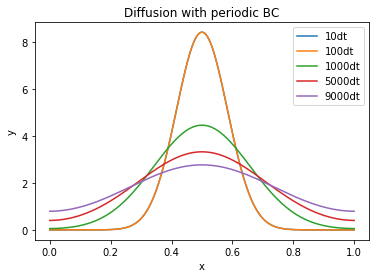

In [29]:
plt.figure()
plt.plot(x,main[100,:],label = '10dt')
plt.plot(x,main[100,:],label='100dt')
plt.plot(x,main[1000,:],label = '1000dt')
plt.plot(x,main[2000,:],label = '5000dt')
plt.plot(x,main[3000,:],label = '9000dt')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diffusion with periodic BC')